<a href="https://colab.research.google.com/github/Sbilalahmad/AI_ML_mentorship/blob/main/P3_Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P_3
# Diabetes predicion ML project
## 1. Title & Objective

**Title:** Diabetes Prediction Using Machine Learning
**Objective:**
To build and evaluate machine learning models that predict whether a patient has diabetes based on medical attributes.

---

## 2. Dataset Description

**Common choice:** *Pima Indians Diabetes Dataset*

**Features:**

* `Pregnancies`
* `Glucose`
* `BloodPressure`
* `SkinThickness`
* `Insulin`
* `BMI`
* `DiabetesPedigreeFunction`
* `Age`

**Target Variable:**

* `Outcome`

  * `1` → Diabetic
  * `0` → Non-diabetic


# 3. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Other Libraries we'll be importing as required.

# 4. Load the Dataset
Let's Grab the dataset from Kaggle

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Testing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ehababoelnaga/diabetes-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3095695563.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'diabetes-dataset' dataset.
First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      120             72             22       56  20.8   
1            1       71             62              0        0  21.8   
2            8       74             70             40       49  35.3   
3            5       88             78             30        0  27.6   
4           10      115             98              0        0  24.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.733   48        0  
1                     0.416   26        0  
2                     0.705   39        0  
3                     0.258   37        0  
4                     1.022   34        0  


## 5 Let's do the EDA (Exploratory Data Analysis)


1.   Analytically
2.   Visually



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               308 non-null    int64  
 1   Glucose                   308 non-null    int64  
 2   BloodPressure             308 non-null    int64  
 3   SkinThickness             308 non-null    int64  
 4   Insulin                   308 non-null    int64  
 5   BMI                       308 non-null    float64
 6   DiabetesPedigreeFunction  308 non-null    float64
 7   Age                       308 non-null    int64  
 8   Outcome                   308 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.8 KB


In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0
5,0,124,56,13,105,21.8,0.452,21,0
6,0,74,52,10,36,27.8,0.269,22,0
7,0,97,64,36,100,36.8,0.600,25,0
8,8,120,0,0,0,30.0,0.183,38,1
9,6,154,78,41,140,46.1,0.571,27,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.describe()
# .style.background_gradient(cmap='Greens')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3.863636,119.983766,69.503247,20.694805,77.724026,31.865909,0.445042,33.730519,0.301948
std,3.381437,31.186260,19.555067,16.298250,106.528025,7.427594,0.297660,12.208374,0.459850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.750000,62.000000,0.000000,0.000000,27.400000,0.228250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.348000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,127.750000,36.425000,0.600000,42.000000,1.000000
max,13.000000,199.000000,114.000000,99.000000,600.000000,57.300000,1.699000,70.000000,1.000000


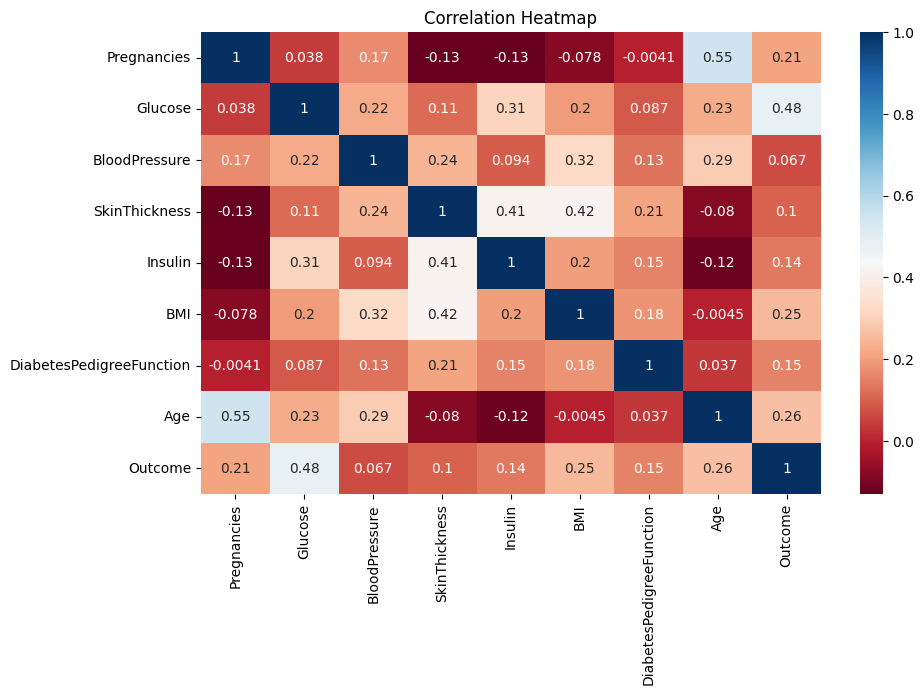

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

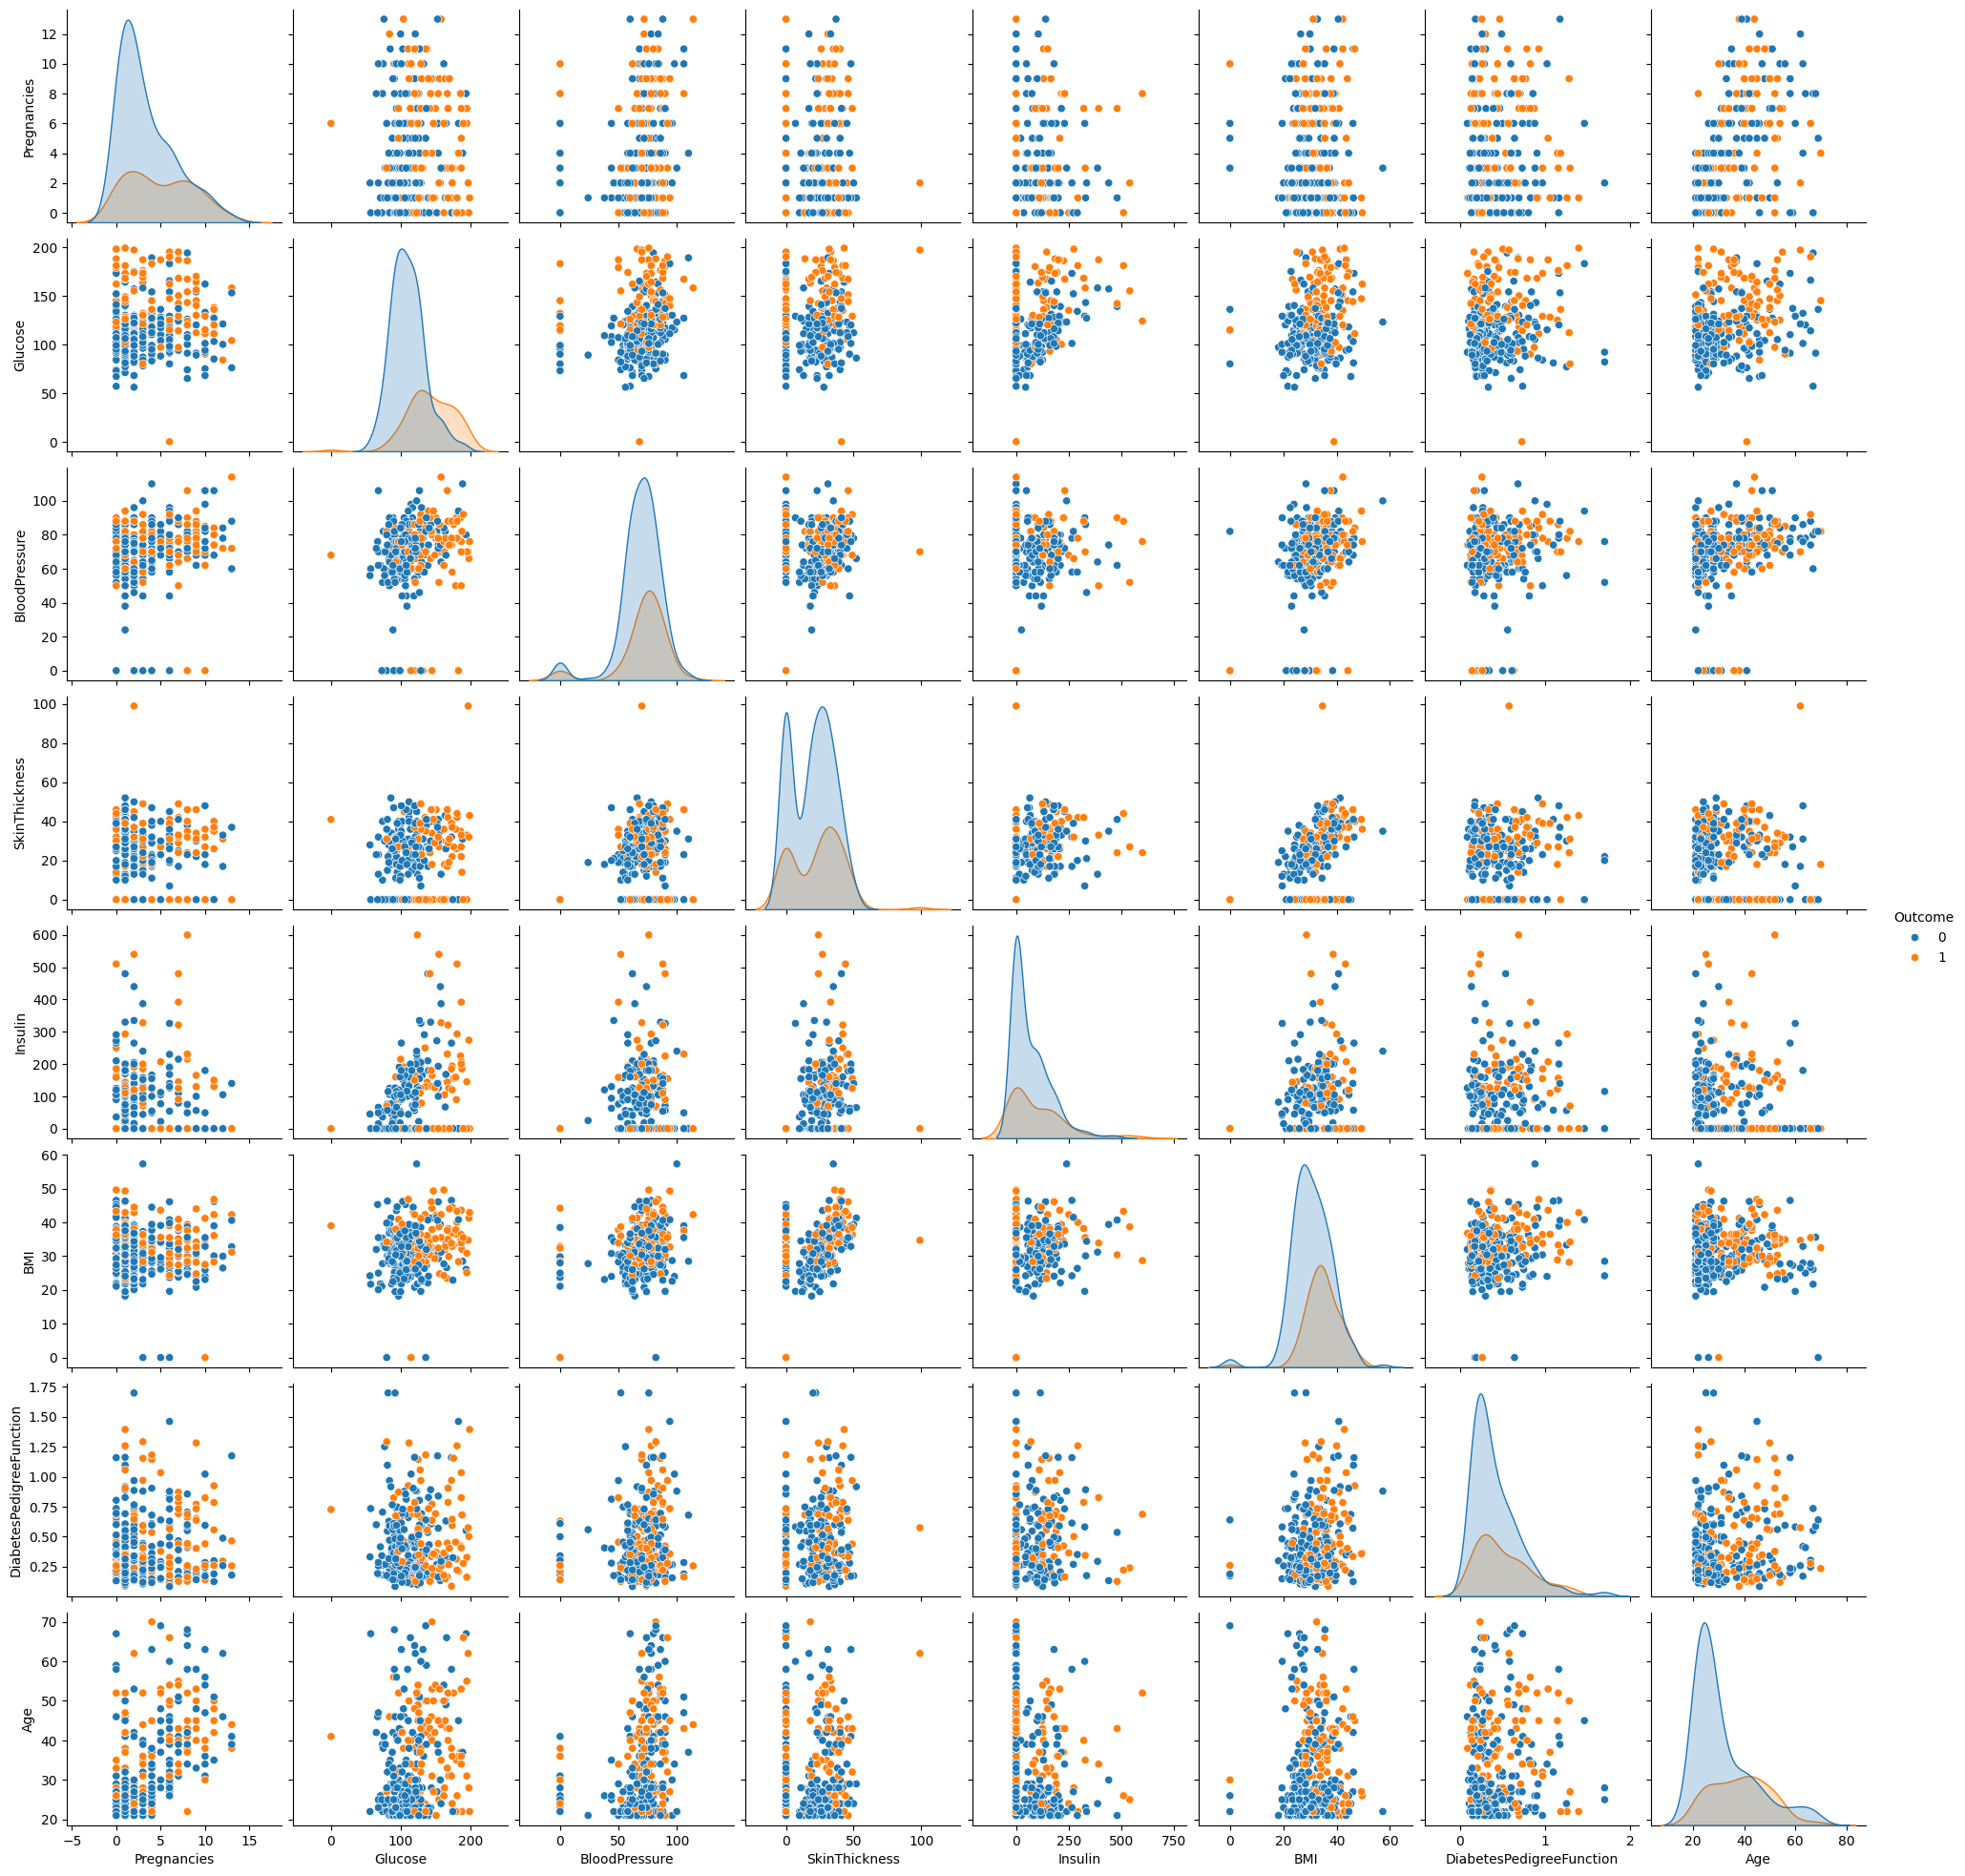

In [9]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='Outcome')
plt.show()

In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,215
1,93


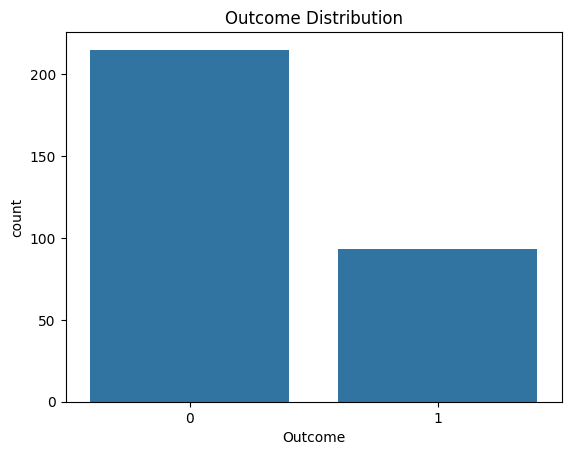

In [11]:
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.show()

# Below is a clean cheat-sheet + examples 👇

---

## Commonly used colormaps in `pandas.style`

### 🔥 Sequential (low → high)

Best for ordered data like scores, counts, percentages.

Popular choices:

* `"viridis"` ✅ (default, perceptually uniform)
* `"plasma"`
* `"inferno"`
* `"magma"`
* `"cividis"` (color-blind friendly)
* `"Greens"`
* `"Blues"`
* `"Reds"`
* `"Oranges"`
* `"Purples"`

---

### ⚖️ Diverging (negative ↔ positive)
Popular choices:

* `"coolwarm"` ✅
* `"RdBu"`
* `"RdYlGn"`
* `"RdYlBu"`
* `"Spectral"`
* `"seismic"`
* `"bwr"`

---

### 🌈 Qualitative (categories)

Not ideal for gradients, but usable in some cases.

* `"tab10"`
* `"tab20"`
* `"Set1"`
* `"Set2"`
* `"Paired"`

⚠️ These are better for plots than gradients.

---

### 🌑 Special / stylistic

Fun or niche cases:

* `"gray"` / `"Greys"`
* `"bone"`
* `"hot"`
* `"cool"`
* `"pink"`
* `"cubehelix"`

---



## See *all* available colormaps

```python
import matplotlib.pyplot as plt

plt.colormaps()
```

(or older versions:)

```python
plt.cm.datad.keys()
```

---

### TL;DR recommendations

* **General use:** `viridis`
* **Positive vs negative:** `coolwarm` or `RdBu`
* **Finance / KPIs:** `Greens`, `RdYlGn`
* **Accessibility:** `cividis`


# 6. Data Preprocessing
Handling Invalid Zero Values

(Some columns cannot logically be zero)

In [12]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols]=df[cols].replace(0,np.nan)
df.fillna(df.median(),inplace=True)

## Feature & Target Split

In [13]:
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

In [14]:
X.shape,Y.shape

((308, 8), (308,))

##### Let's make the data balanced for preventing model to be bias on larger number of outcomes.

In [15]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X,Y=smote.fit_resample(X,Y)

### Let's bring the Feature in the same Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X.columns=df.drop(columns='Outcome',axis=1).columns
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.396999,-0.225722,-0.153710,-1.006753,-1.102555,-2.020733,0.986465,1.081036
1,-1.298252,-1.780003,-1.029340,-0.034017,-0.267169,-1.854494,-0.125058,-0.783431
2,1.060092,-1.684843,-0.328836,1.181902,-1.185501,0.389723,0.888286,0.318300
3,0.049373,-1.240763,0.371668,-0.034017,-0.267169,-0.890312,-0.679066,0.148803
4,1.733905,-0.384322,2.122928,-0.034017,-0.267169,-1.488770,1.999809,-0.105443


### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

# 7. Model Selection and Training

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [19]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':SVC()
}

###8. Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

for name,model in models.items():
  model.fit(X_train,Y_train)
  train_accuracy=model.score(X_train,Y_train)
  test_accuracy=model.score(X_test,Y_test)
  print(f'{name}\n Training Accuracy: {train_accuracy}\n Testing Accuracy: {test_accuracy}')
  if train_accuracy > test_accuracy:
    print('Overfitting')
    print(f'{train_accuracy-test_accuracy:.2f}')
  else:
    print('Underfitting')


LogisticRegression
 Training Accuracy: 0.7994186046511628
 Testing Accuracy: 0.7674418604651163
Overfitting
0.03
DecisionTreeClassifier
 Training Accuracy: 1.0
 Testing Accuracy: 0.7558139534883721
Overfitting
0.24
KNeighborsClassifier
 Training Accuracy: 0.8575581395348837
 Testing Accuracy: 0.7906976744186046
Overfitting
0.07
SVC
 Training Accuracy: 0.8953488372093024
 Testing Accuracy: 0.813953488372093
Overfitting
0.08


# Select the model with least difference in train_accuracy and test_accuracy

In [21]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

# Let's compile Our mode and some function for the implementation

In [37]:
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]])
    input_data = scaler.transform(input_data)
    input_data = pd.DataFrame(input_data, columns=X.columns)
    prediction = model.predict(input_data)
    return prediction[0]

In [23]:
import joblib
import pickle

In [24]:
joblib.dump(model,'diabetes_prediction_model.joblib')
pickle.dump(model,open('diabetes_prediction_model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [44]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48,0
1,1.0,71.0,62.0,30.0,126.5,21.8,0.416,26,0
2,8.0,74.0,70.0,40.0,49.0,35.3,0.705,39,0
3,5.0,88.0,78.0,30.0,126.5,27.6,0.258,37,0
4,10.0,115.0,98.0,30.0,126.5,24.0,1.022,34,0
5,4.0,124.0,56.0,13.0,105.0,21.8,0.452,21,0
6,4.0,74.0,52.0,10.0,36.0,27.8,0.269,22,0
7,4.0,97.0,64.0,36.0,100.0,36.8,0.600,25,0
8,8.0,120.0,74.0,30.0,126.5,30.0,0.183,38,1
9,6.0,154.0,78.0,41.0,140.0,46.1,0.571,27,0


In [43]:
preg=3.0
gluc=158.0
bp=70.0
sth=30.0
insu=326.0
BMI=35.5
dpf=0.344
Age=35
predict_diabetes(preg,gluc,bp,sth,insu,BMI,dpf,Age)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(1)